In [11]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import glob
from skimage import exposure

(723, 1281, 3)


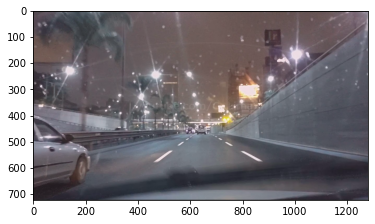

In [12]:
img=cv2.imread('test_image_8.jpg',1) #8

print(img.shape)
plt.imshow(img)
plt.show()


(700, 1200, 3)


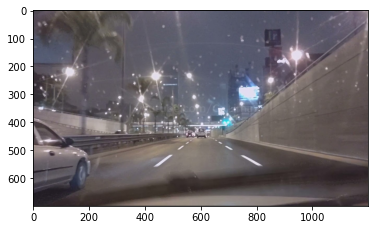

In [13]:
img=cv2.resize(img,(1200,700))
print (img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_process=np.copy(img)
plt.imshow(img_process)
plt.show()

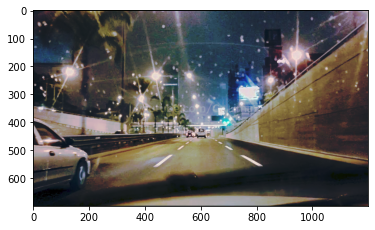

In [14]:
ref = cv2.imread('test_image_10.jpg')
ref=cv2.resize(ref,(1200,700))
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)

multi = True if img_process.shape[-1] > 1 else False
matched = exposure.match_histograms(img_process, ref, multichannel=multi)
plt.imshow(matched)
plt.show()

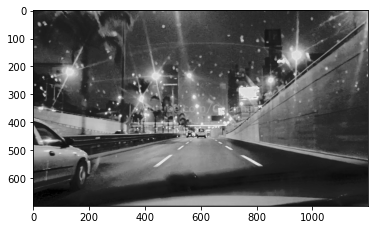

In [15]:
gray=cv2.cvtColor(matched,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()


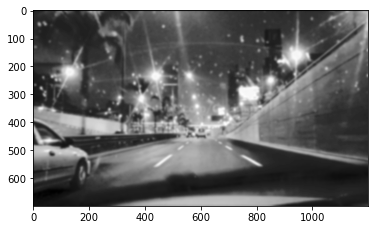

In [16]:
kernel=15
gauss_filter = cv2.GaussianBlur(gray,(kernel,kernel),3)
plt.imshow(gauss_filter,cmap='gray')
plt.show()


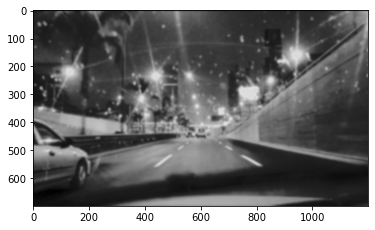

In [17]:
gray_rgb=cv2.cvtColor(gauss_filter,cv2.COLOR_GRAY2RGB)
plt.imshow(gray_rgb)
plt.show()


In [18]:
hsv=cv2.cvtColor(gray_rgb,cv2.COLOR_RGB2HSV)


In [19]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib import colors
# #r, g, b = cv2.split(gray_rgb)
# #fig = plt.figure()
# pixel_colors = gray_rgb.reshape((np.shape(gray_rgb)[0]*np.shape(gray_rgb)[1], 3))
# norm = colors.Normalize(vmin=-1.,vmax=1.)
# norm.autoscale(pixel_colors)
# pixel_colors = norm(pixel_colors).tolist()



# h, s, v = cv2.split(hsv)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")
# plt.show()

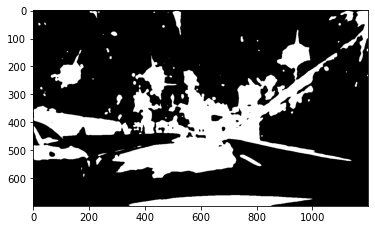

In [20]:
l_w=np.array([0,0,120])
u_w=np.array([0,0,255])
mask=cv2.inRange(hsv,l_w,u_w)
#mask=255-mask
plt.imshow(mask,cmap='gray')
plt.show()